# **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow.keras.applications import VGG16, VGG19
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Data**

In [3]:
img_height = 224
img_width = 224
batch_size = 64

In [4]:
train_folder="/content/drive/MyDrive/cards/train"
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = True)

Found 7509 files belonging to 4 classes.


In [5]:
valid_folder="/content/drive/MyDrive/cards/valid"
val_ds = tf.keras.utils.image_dataset_from_directory(
  valid_folder,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = False)

Found 260 files belonging to 4 classes.


In [6]:
test_folder="/content/drive/MyDrive/cards/test"
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_folder,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = False)

Found 260 files belonging to 4 classes.


In [14]:
test_images = np.concatenate([x for x, _ in test_ds], axis=0)
test_labels = np.concatenate([y for _, y in test_ds], axis=0)

In [24]:
val_images = np.concatenate([x for x, _ in val_ds], axis=0)
val_labels = np.concatenate([y for _, y in val_ds], axis=0)

In [21]:
label_to_class_name = dict(zip(range(len(train_ds.class_names)), train_ds.class_names))
label_to_class_name

{0: 'clubs', 1: 'diamonds', 2: 'hearts', 3: 'spades'}

# **Show Images**

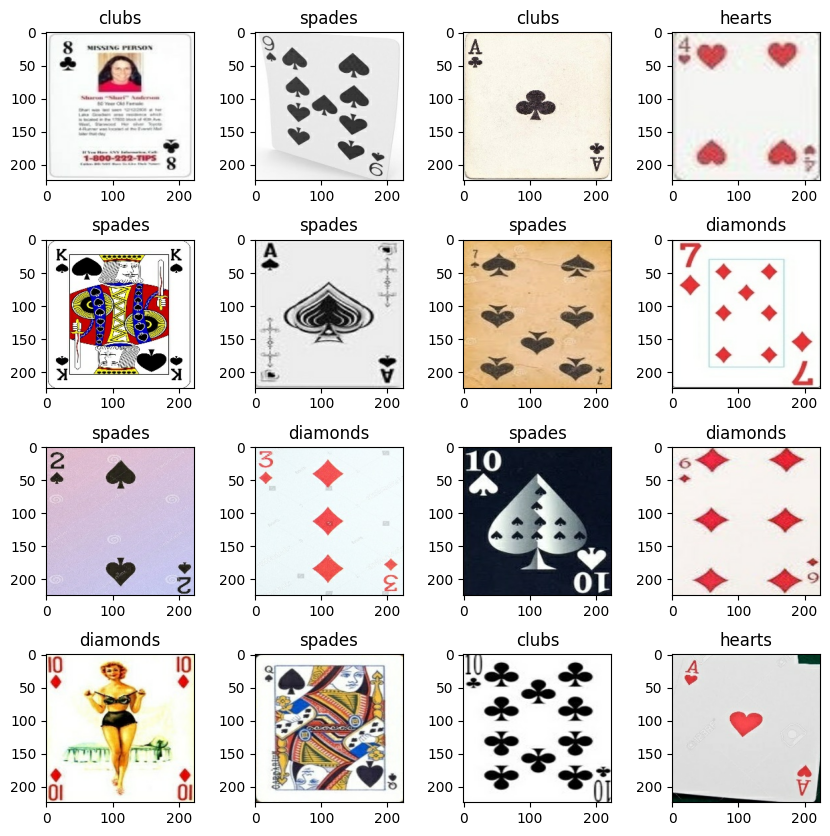

In [ ]:
data_iterator = train_ds.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        index = i * 4 + j

        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

Normalization

In [8]:
train_ds=train_ds.map(lambda x,y:(x/255,y))
val_ds=val_ds.map(lambda x,y:(x/255,y))

# **Simple model**

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(4))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │       6,422,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,451,332 (24.61 MB)

 Trainable params: 6,451,332 (24.61 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [ ]:
epochs=10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 838s 7s/step - accuracy: 0.3548 - loss: 1.6505 - val_accuracy: 0.6192 - val_loss: 0.7949
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 23s 198ms/step - accuracy: 0.6117 - loss: 0.8698 - val_accuracy: 0.7846 - val_loss: 0.4763
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 204ms/step - accuracy: 0.7252 - loss: 0.6429 - val_accuracy: 0.8500 - val_loss: 0.3682
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.7928 - loss: 0.5039 - val_accuracy: 0.8385 - val_loss: 0.3242
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.8477 - loss: 0.3884 - val_accuracy: 0.8846 - val_loss: 0.2656
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 205ms/step - accuracy: 0.8861 - loss: 0.3005 - val_accuracy: 0.8885 - val_loss: 0.2365
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 208ms/step - accuracy: 0.9036 - loss: 0.2560 - val_accuracy: 0.9115 - val_loss: 0.2179
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 205ms/step - accuracy: 0.9157 - loss: 0.2

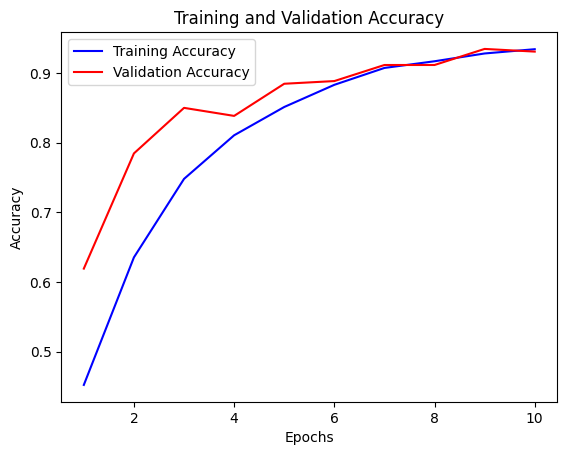

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Prediction

In [ ]:
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


Metrics

In [ ]:
accuracy = accuracy_score(test_labels, predicted_classes)
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
f1 = f1_score(test_labels, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9231
Precision: 0.9261
Recall: 0.9231
F1-Score: 0.9233


In [ ]:
plt.figure(figsize=(20, 10))
for i, idx in enumerate(np.random.choice(len(test_images), size=10, replace=False)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))

    true_label = label_to_class_name[test_labels[idx]]
    predicted_label = label_to_class_name[predicted_classes[idx]]

    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **VGG16**

In [15]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), classes=4)

x = base_model.output
x = Flatten()(x)
predictions = Dense(4, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model_vgg16.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         100,356 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 14,815,044 (56.51 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [ ]:
epochs = 10
history = model_vgg16.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


118/118 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.2565 - loss: 1.5703 - val_accuracy: 0.5115 - val_loss: 0.9227
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 96s 814ms/step - accuracy: 0.5413 - loss: 0.9030 - val_accuracy: 0.7231 - val_loss: 0.4768
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 96s 815ms/step - accuracy: 0.6951 - loss: 0.5821 - val_accuracy: 0.8154 - val_loss: 0.3308
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 96s 815ms/step - accuracy: 0.8466 - loss: 0.3824 - val_accuracy: 0.9423 - val_loss: 0.1655
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 96s 815ms/step - accuracy: 0.9176 - loss: 0.2324 - val_accuracy: 0.9538 - val_loss: 0.1042
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 142s 815ms/step - accuracy: 0.9339 - loss: 0.1999 - val_accuracy: 0.9846 - val_loss: 0.0622
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 142s 814ms/step - accuracy: 0.9633 - loss: 0.1332 - val_accuracy: 0.9846 - val_loss: 0.0399
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 96s 815ms/step - accuracy: 0.9656 - loss: 0.1170 - val

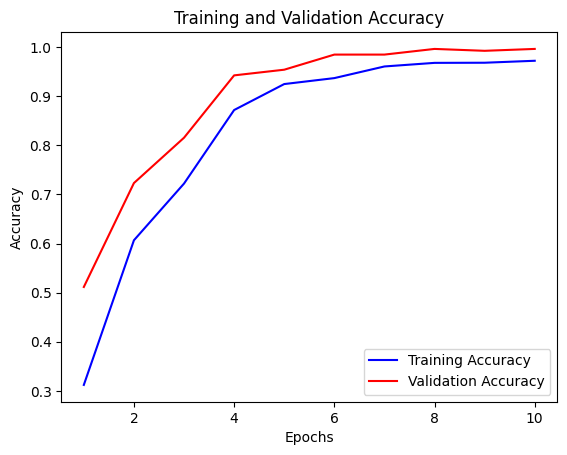

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Predictions

In [ ]:
predictions = model_vgg16.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step


Metrics

In [ ]:
accuracy = accuracy_score(test_labels, predicted_classes)
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
f1 = f1_score(test_labels, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9308
Precision: 0.9372
Recall: 0.9308
F1-Score: 0.9306


In [ ]:
plt.figure(figsize=(20, 10))
for i, idx in enumerate(np.random.choice(len(test_images), size=10, replace=False)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))

    true_label = label_to_class_name[test_labels[idx]]
    predicted_label = label_to_class_name[predicted_classes[idx]]

    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **VGG19**

In [ ]:
inputs = (224, 224, 3)

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=inputs))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model_vgg19 = model

model_vgg19.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model_vgg19.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,586,628 (532.48 MB)

 Trainable params: 139,586,628 (532.48 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [ ]:
epochs = 10
history = model_vgg19.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.3037 - loss: 1.3482 - val_accuracy: 0.5115 - val_loss: 0.8782
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5535 - loss: 0.8231 - val_accuracy: 0.8846 - val_loss: 0.3106
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8691 - loss: 0.3497 - val_accuracy: 0.9231 - val_loss: 0.2179
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9063 - loss: 0.2602 - val_accuracy: 0.9462 - val_loss: 0.1464
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9320 - loss: 0.1998 - val_accuracy: 0.9423 - val_loss: 0.1494
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9383 - loss: 0.1756 - val_accuracy: 0.9615 - val_loss: 0.1166
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9484 - loss: 0.1431 - val_accuracy: 0.9615 - val_loss: 0.1235
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9546 - loss: 0.1350 - val_accu

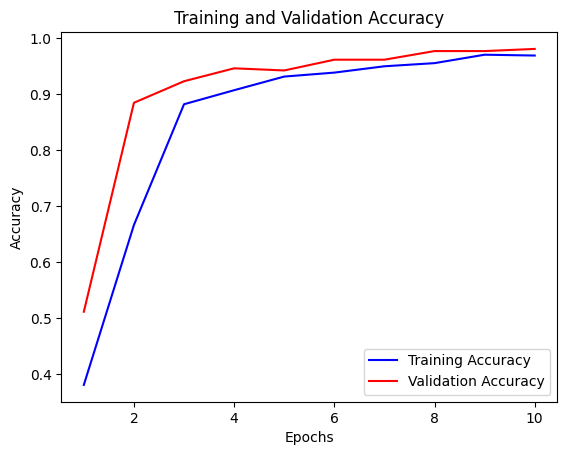

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Predictions

In [ ]:
predictions = model_vgg19.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step


Metrics

In [ ]:
accuracy = accuracy_score(test_labels, predicted_classes)
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
f1 = f1_score(test_labels, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9808
Precision: 0.9808
Recall: 0.9808
F1-Score: 0.9807


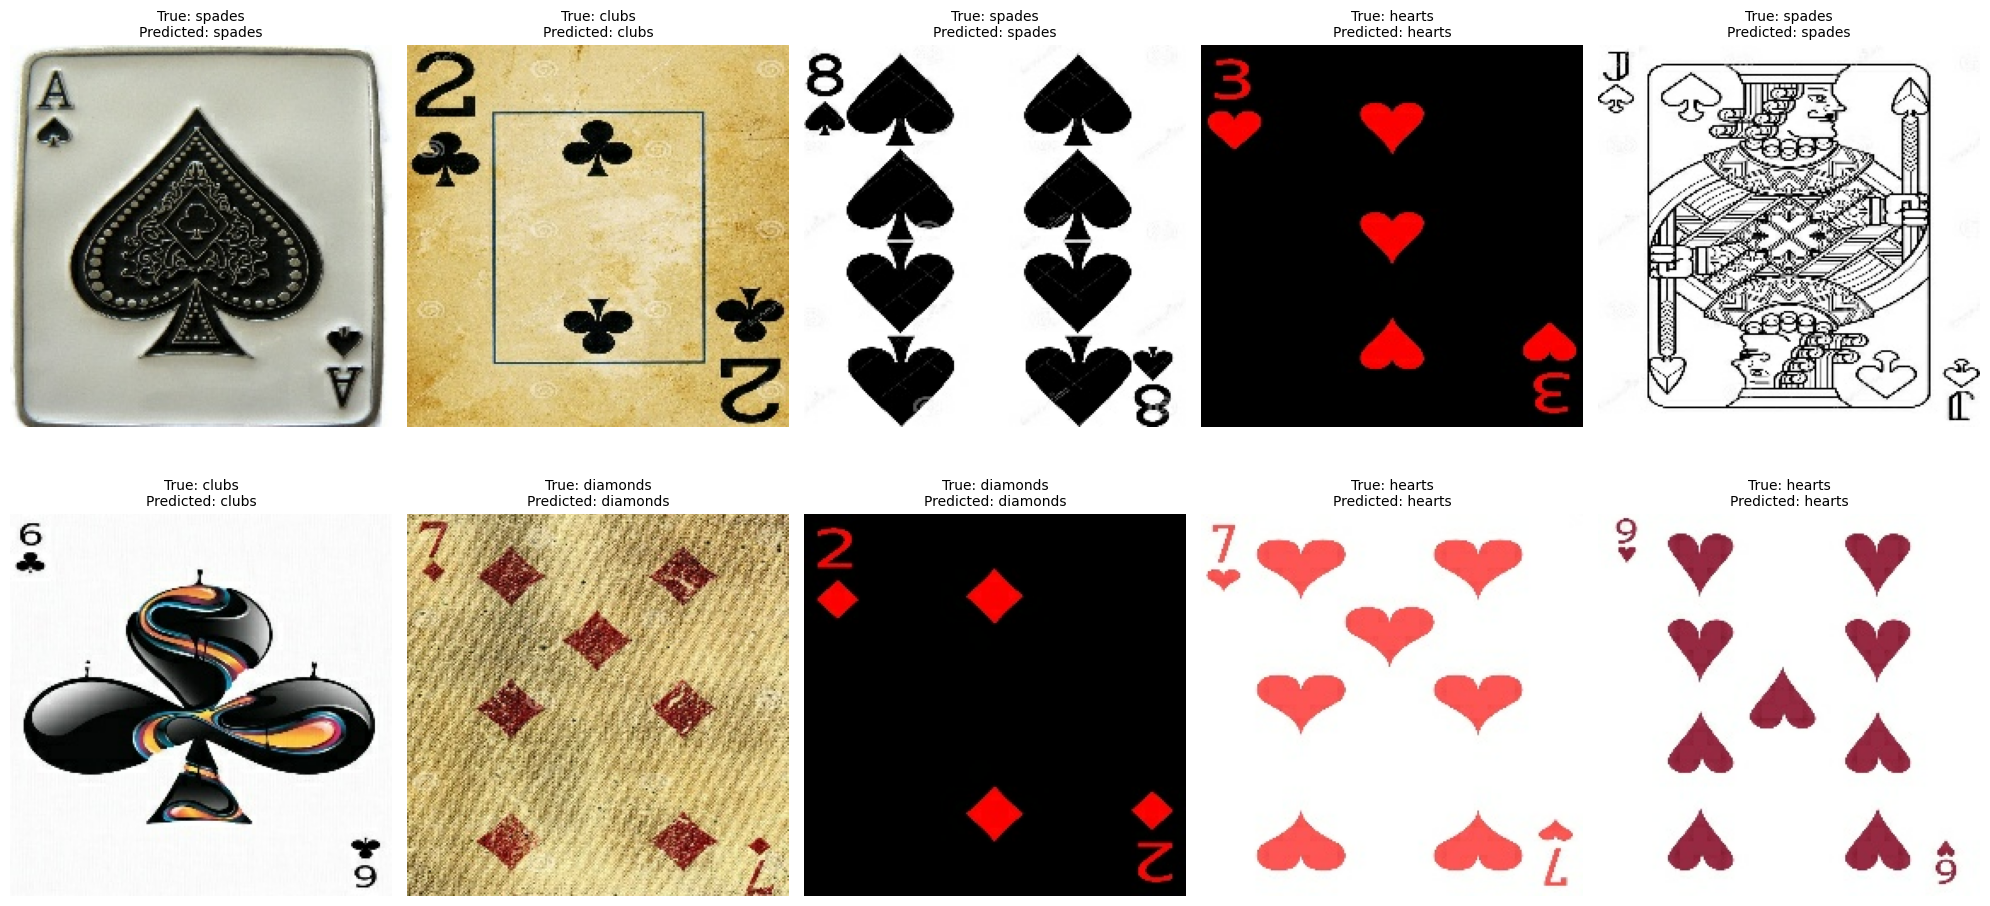

In [ ]:
plt.figure(figsize=(20, 10))
for i, idx in enumerate(np.random.choice(len(test_images), size=10, replace=False)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))

    true_label = label_to_class_name[test_labels[idx]]
    predicted_label = label_to_class_name[predicted_classes[idx]]

    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

# **AlexNet**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout


inputs = Input(shape=(224, 224, 3))

x = Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', padding='valid')(inputs)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same')(x)

x = Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same')(x)

x = Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs, name="AlexNet")

alexnet_model = model

alexnet_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

alexnet_model.summary()

Model: "AlexNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │          16,388 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,763,396 (178.39 MB)

 Trainable params: 46,763,396 (178.39 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [ ]:
epochs = 10
history = alexnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


118/118 ━━━━━━━━━━━━━━━━━━━━ 63s 412ms/step - accuracy: 0.3433 - loss: 1.3941 - val_accuracy: 0.6231 - val_loss: 0.8115
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.5758 - loss: 0.8144 - val_accuracy: 0.6885 - val_loss: 0.6383
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.6700 - loss: 0.6237 - val_accuracy: 0.8615 - val_loss: 0.3716
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.8095 - loss: 0.4418 - val_accuracy: 0.9269 - val_loss: 0.2344
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8492 - loss: 0.3545 - val_accuracy: 0.9269 - val_loss: 0.2027
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8770 - loss: 0.3064 - val_accuracy: 0.9077 - val_loss: 0.2595
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8979 - loss: 0.2573 - val_accuracy: 0.9269 - val_loss: 0.1989
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9148 - loss: 0.2292 - val_accuracy: 0.

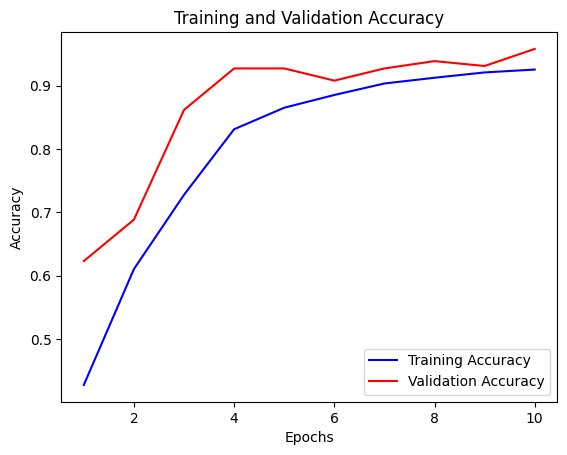

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Predictions

In [ ]:
predictions = alexnet_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step


Metrics

In [ ]:
accuracy = accuracy_score(test_labels, predicted_classes)
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
f1 = f1_score(test_labels, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9192
Precision: 0.9195
Recall: 0.9192
F1-Score: 0.9193


In [ ]:
plt.figure(figsize=(20, 10))
for i, idx in enumerate(np.random.choice(len(test_images), size=10, replace=False)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))

    true_label = label_to_class_name[test_labels[idx]]
    predicted_label = label_to_class_name[predicted_classes[idx]]

    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.